In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the CSV dataset using pandas
df = pd.read_csv("dataset_stu.csv")

In [6]:
cols = pd.DataFrame(df.columns)
cols

0
0                     PRN No.
1      DSA(CSE2001) CAT1 (50)
2      DSA(CSE2001) CAT2 (50)
3       DSA(CSE2001) FAT (60)
4    DSA(CSE2001) Total (160)
..                        ...
208          Sem-VII & VIII %
209     Sem-VII & VIII Grade 
210       Grand Total (5000) 
211                        % 
212                    Grade 

[213 rows x 1 columns]

## Preprocessing

In [28]:
#removing spaces in cells of df
df = df.replace(' ', '', regex=True)

# fill null values in columns with word 'Grade' with 'F' - we knew F cuz we went through the dataset
df.loc[:, df.columns.str.contains('Grade')] = df.loc[:, df.columns.str.contains('Grade')].fillna('F')

#Capitalising all grades in Status to remove ambiguity (p and P are the same)
#df.loc[:, df.columns.str.contains('Status')] = df.loc[:, df.columns.str.contains('Status')].apply(lambda x: x.str.upper())


## Visualisation

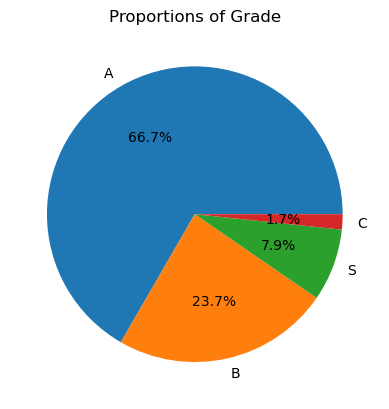

In [29]:
# Plot the distribution of the "grade" column
import matplotlib.pyplot as plt
grade_counts = df[' Grade '].value_counts()
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%')
plt.title('Proportions of Grade')
plt.show()

## Preprocessing

In [30]:
#label encoding
from sklearn.preprocessing import LabelEncoder

#grades
grade_cols = [col for col in df.columns if "Grade" in col]
custom_mapping = {'F': 1, 'D' : 2, 'C': 3, 'B': 4, 'A': 5, 'S': 6}
for col in grade_cols:
    le = LabelEncoder()
    le.fit(list(custom_mapping.keys()))
    df[col] = df[col].apply(lambda x: custom_mapping[x])

#status

le = LabelEncoder()
status_cols = [col for col in df.columns if 'status' in col.lower()]
for col in status_cols:
    df[col] = df[col].apply(lambda x: 1 if 'p' in str(x).lower() or 'pass' in str(x).lower() or 'atkt' in str(x).lower() else 0)


In [31]:
# Create a new data frame to store all sem-wise results
sem_df = df.filter(regex='^Sem')
df = df.drop(columns=df.filter(regex='^Sem').columns)
sem_df.head()

Sem-III Total (980)  Sem-III %  Sem-III Grade  Sem-IV Total (980)  \
0                  703      87.88              6                 715   
1                  607      75.88              5                 618   
2                  546      68.25              4                 569   
3                  598      74.75              5                 614   
4                  580      72.50              5                 574   

   Sem-IV %  Sem-IV Grade  Sem-IV Passin subjects (6)  \
0     89.38             6                           6   
1     77.25             5                           6   
2     71.13             4                           6   
3     76.75             5                           6   
4     71.75             5                           6   

   Sem-III & IV Grand Total (1960)  Sem-III & IV %  Sem III & Sem IV Grade  \
0                             1418           88.63                       6   
1                             1225           76.56                       5   
2                             1115           69.69                       5   
3                             1212           75.75                       5   
4                             1154           72.13                       5   

   ...  Sem-V & VI TY Grade  Sem-VII Total (980)  Sem-VII %  Sem-VII Grade  \
0  ...                    5                  644      78.06              5   
1  ...                    5                  614      74.42              5   
2  ...                    5                  586      71.03              5   
3  ...                    5                  623      75.52              5   
4  ...                    4                  563      68.24              4   

   Sem-VIII Total (780)  Sem-VIII %  Sem-VIII Grade  \
0                   792       96.00               6   
1                   767       92.97               6   
2                   746       90.42               6   
3                   761       92.24               6   
4                   761       92.24               6   

   Sem-VII & VIII Grand Total (1650)  Sem-VII & VIII %  Sem-VII & VIII Grade   
0                               1436             87.03                      6  
1                               1381             83.70                      5  
2                               1332             80.73                      5  
3                               1384             83.88                      5  
4                               1324             80.24                      5  

[5 rows x 27 columns]

In [32]:
#final_df has the final statistics of a student's performance after all the semesters
final_df = df.iloc[:, -6:]
df = df.drop(df.columns[-6:], axis=1)
final_df.columns

Index(['FOM(MGT1003) FAT (60)', 'FOM(MGT1003) Total (160)',
       'FOM(MGT1003) Grade', 'Grand Total (5000) ', '% ', ' Grade '],
      dtype='object')

In [33]:
#df now only has subject marks
df.head()

PRN No.  DSA(CSE2001) CAT1 (50)  DSA(CSE2001) CAT2 (50)  \
0      W1                      64                      30   
1      W2                      37                      20   
2      W3                      28                      25   
3      W4                      57                      29   
4      W5                      52                      25   

   DSA(CSE2001) FAT (60)  DSA(CSE2001) Total (160)  DSA(CSE2001)Grade  \
0                     24                       118                  6   
1                     24                        81                  4   
2                     23                        76                  4   
3                     24                       110                  6   
4                     24                       101                  6   

   DMS(MAT1003) CAT1 (50)  DMS(MAT1003)CAT2 (50)  DMS(MAT1003)FAT (60)  \
0                      58                     23                    23   
1                      40                     28                    23   
2                      42                     26                    20   
3                      41                     19                    21   
4                      39                     20                    21   

   DMS(MAT1003) Total (160)  ...  COA(ECE2002) Lab (40)  \
0                       104  ...                     44   
1                        91  ...                     44   
2                        88  ...                     45   
3                        81  ...                     42   
4                        80  ...                     43   

  COA(ECE2002) Total (100)  COA(ECE2002) Grade  SNA(CSE4008)  CAT1 (50)  \
0                       88                   6                       70   
1                       88                   6                       67   
2                       91                   6                       70   
3                       83                   6                       70   
4                       86                   6                       70   

   SNA(CSE4008) CAT2 (50) SNA(CSE4008) FAT (60)  SNA(CSE4008) Total (160)  \
0                      26                    23                       119   
1                      26                    24                       117   
2                      22                    22                       114   
3                      23                    21                       114   
4                      25                    23                       118   

   SNA(CSE4008) Grade  FOM(MGT1003) CAT1 (50)  FOM(MGT1003) CAT2 (50)  
0                   6                      70                      29  
1                   6                      70                      28  
2                   6                      70                      28  
3                   6                      70                      24  
4                   6                      70                      25  

[5 rows x 180 columns]

### Feature Reduction

In [34]:
#Pearson Correlation on marks df

from sklearn.model_selection import train_test_split

X = df #features
y = final_df[' Grade '] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

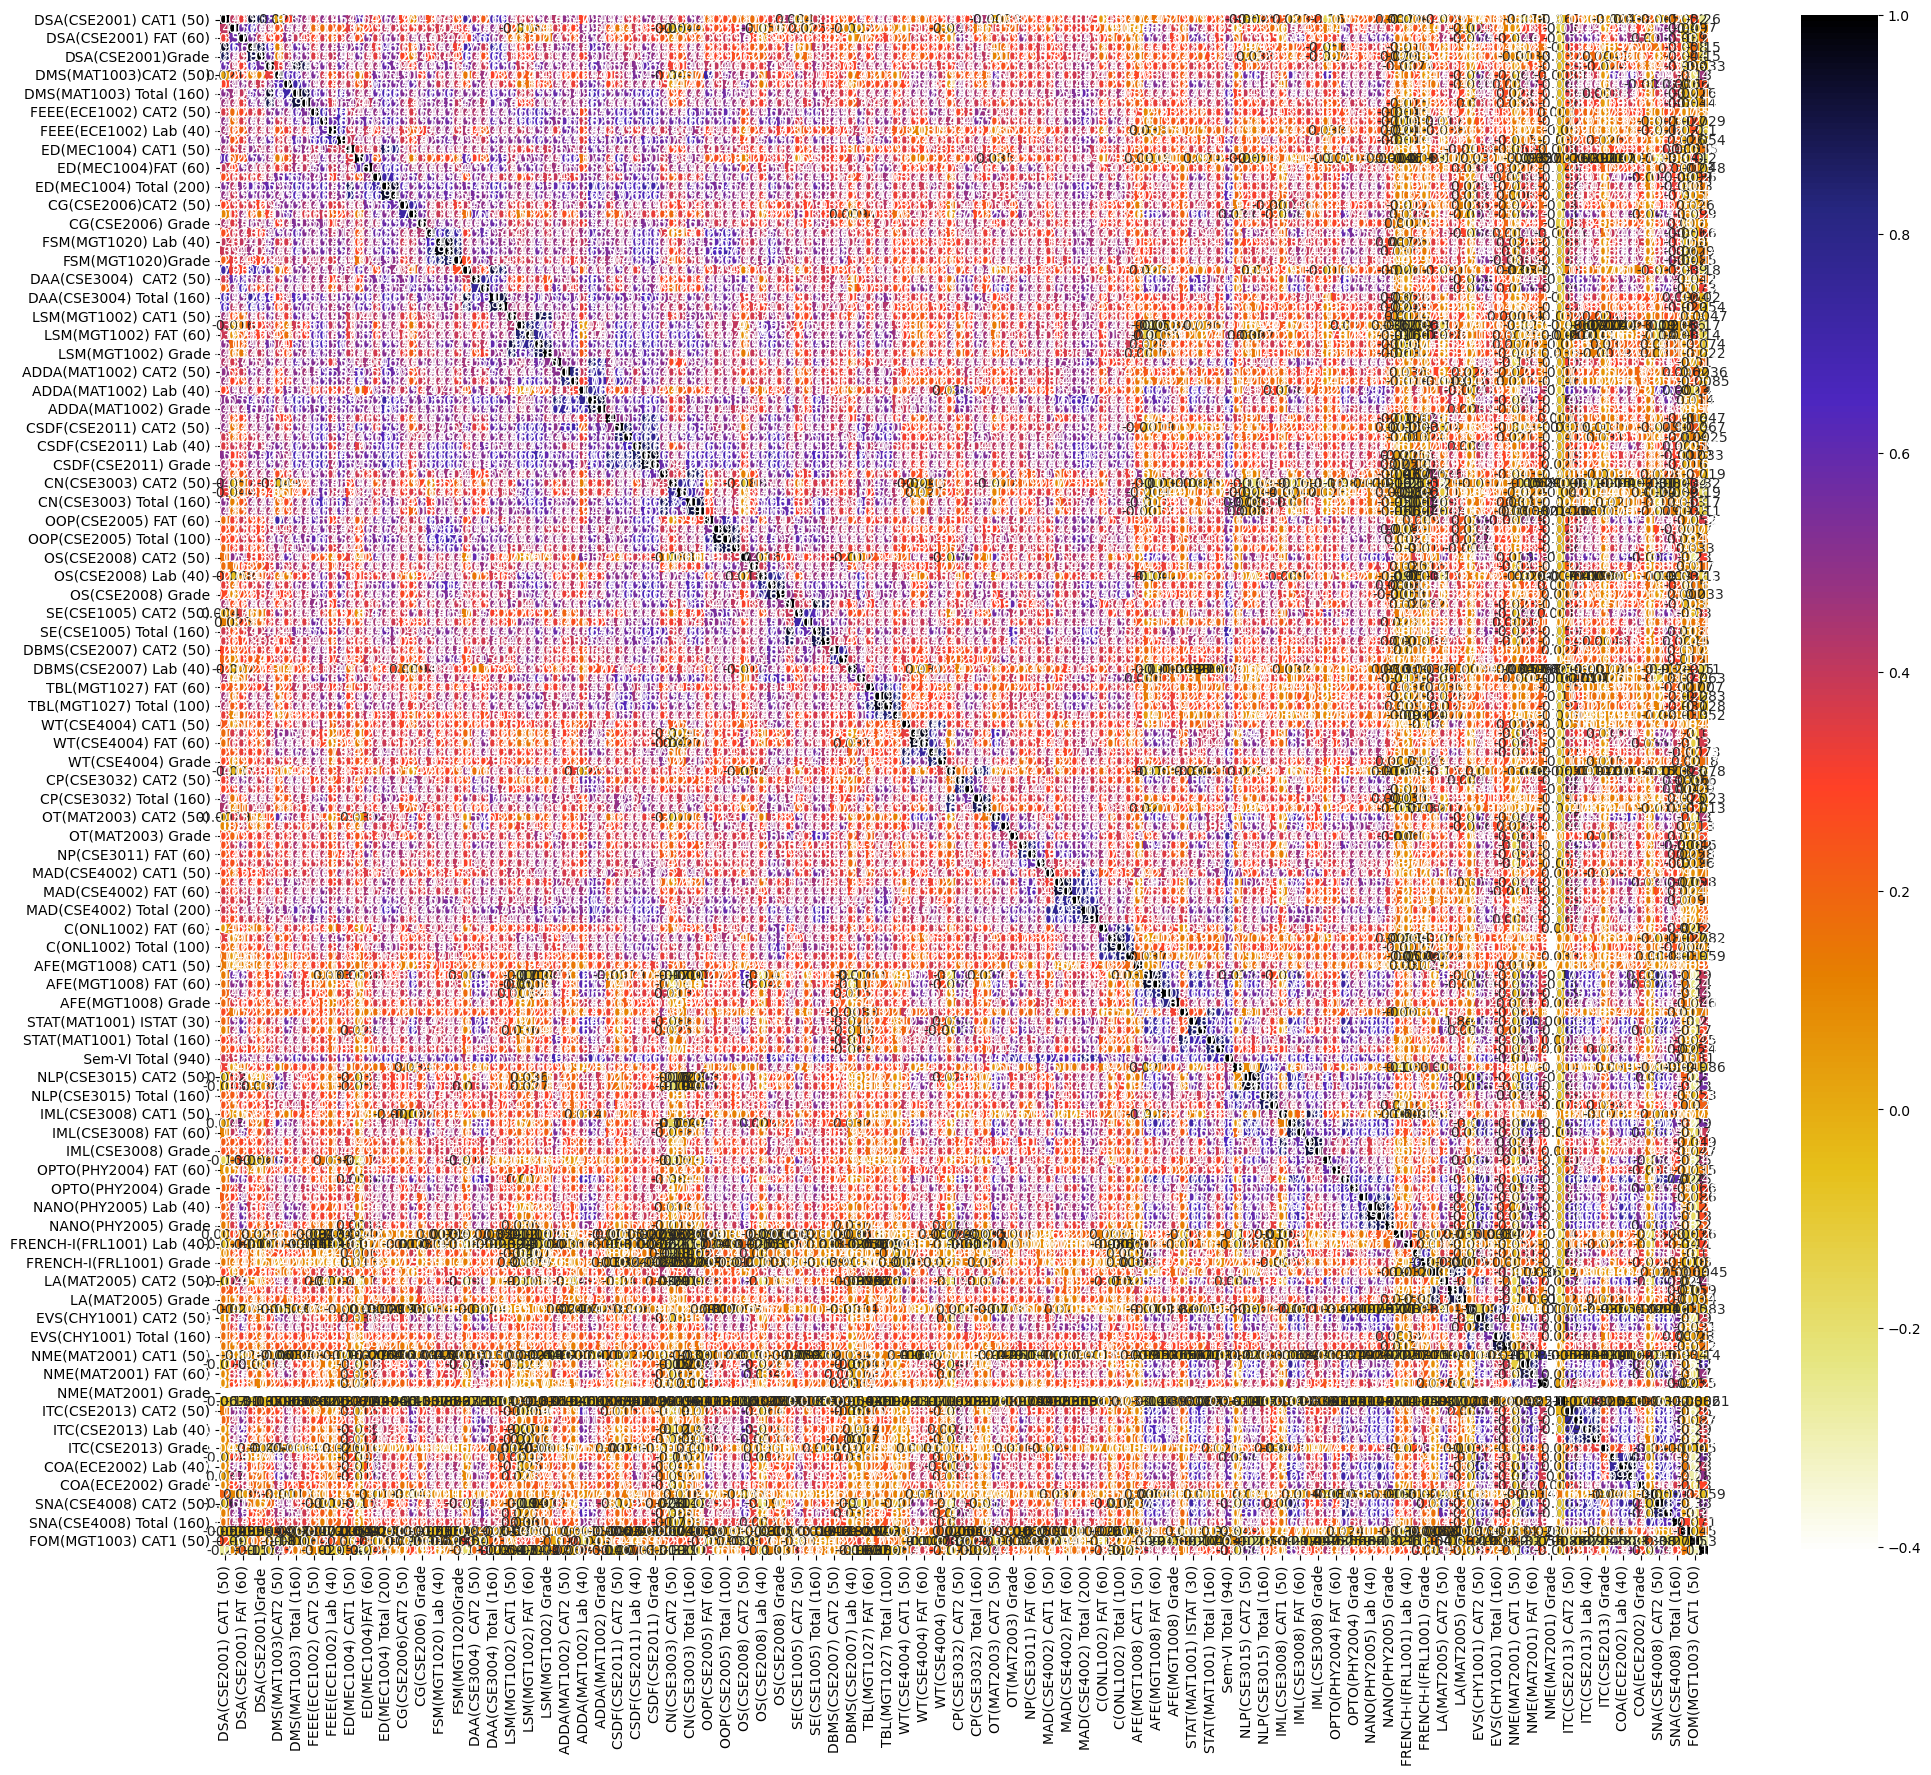

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24,20))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [37]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

23

In [38]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)
df = pd.concat([X_train, X_test], ignore_index=True)
df.head()

PRN No.  DSA(CSE2001) CAT1 (50)  DSA(CSE2001) CAT2 (50)  \
0     W30                      47                      29   
1    W125                      48                      28   
2     W76                      60                      29   
3     W83                      60                      29   
4      W6                      25                      18   

   DSA(CSE2001) FAT (60)  DSA(CSE2001)Grade  DMS(MAT1003) CAT1 (50)  \
0                     24                  6                      40   
1                     24                  6                      50   
2                     25                  6                      49   
3                     25                  6                      46   
4                     18                  1                      33   

   DMS(MAT1003)CAT2 (50)  DMS(MAT1003)FAT (60) FEEE(ECE1002)CAT1 (50)  \
0                     18                    18                     43   
1                     27                    23                     39   
2                     22                    22                     41   
3                     20                    20                     48   
4                     15                    16                     32   

   FEEE(ECE1002) CAT2 (50)  ...  COA(ECE2002) FAT (60)  COA(ECE2002) Lab (40)  \
0                       18  ...                     23                     46   
1                       27  ...                     24                     47   
2                       27  ...                     23                     46   
3                       24  ...                     23                     47   
4                       18  ...                     19                     41   

  COA(ECE2002) Grade  SNA(CSE4008)  CAT1 (50)  SNA(CSE4008) CAT2 (50)  \
0                  6                       68                      25   
1                  6                       70                      26   
2                  6                       70                      25   
3                  6                       70                      26   
4                  5                       70                      25   

   SNA(CSE4008) FAT (60)  SNA(CSE4008) Total (160)  SNA(CSE4008) Grade  \
0                     24                       117                   6   
1                     22                       118                   6   
2                     23                       118                   6   
3                     24                       120                   6   
4                     21                       116                   6   

   FOM(MGT1003) CAT1 (50) FOM(MGT1003) CAT2 (50)  
0                      65                     22  
1                      70                     28  
2                      70                     25  
3                      70                     27  
4                      70                     24  

[5 rows x 157 columns]

In [39]:
df.to_csv('marks.csv', index=False)

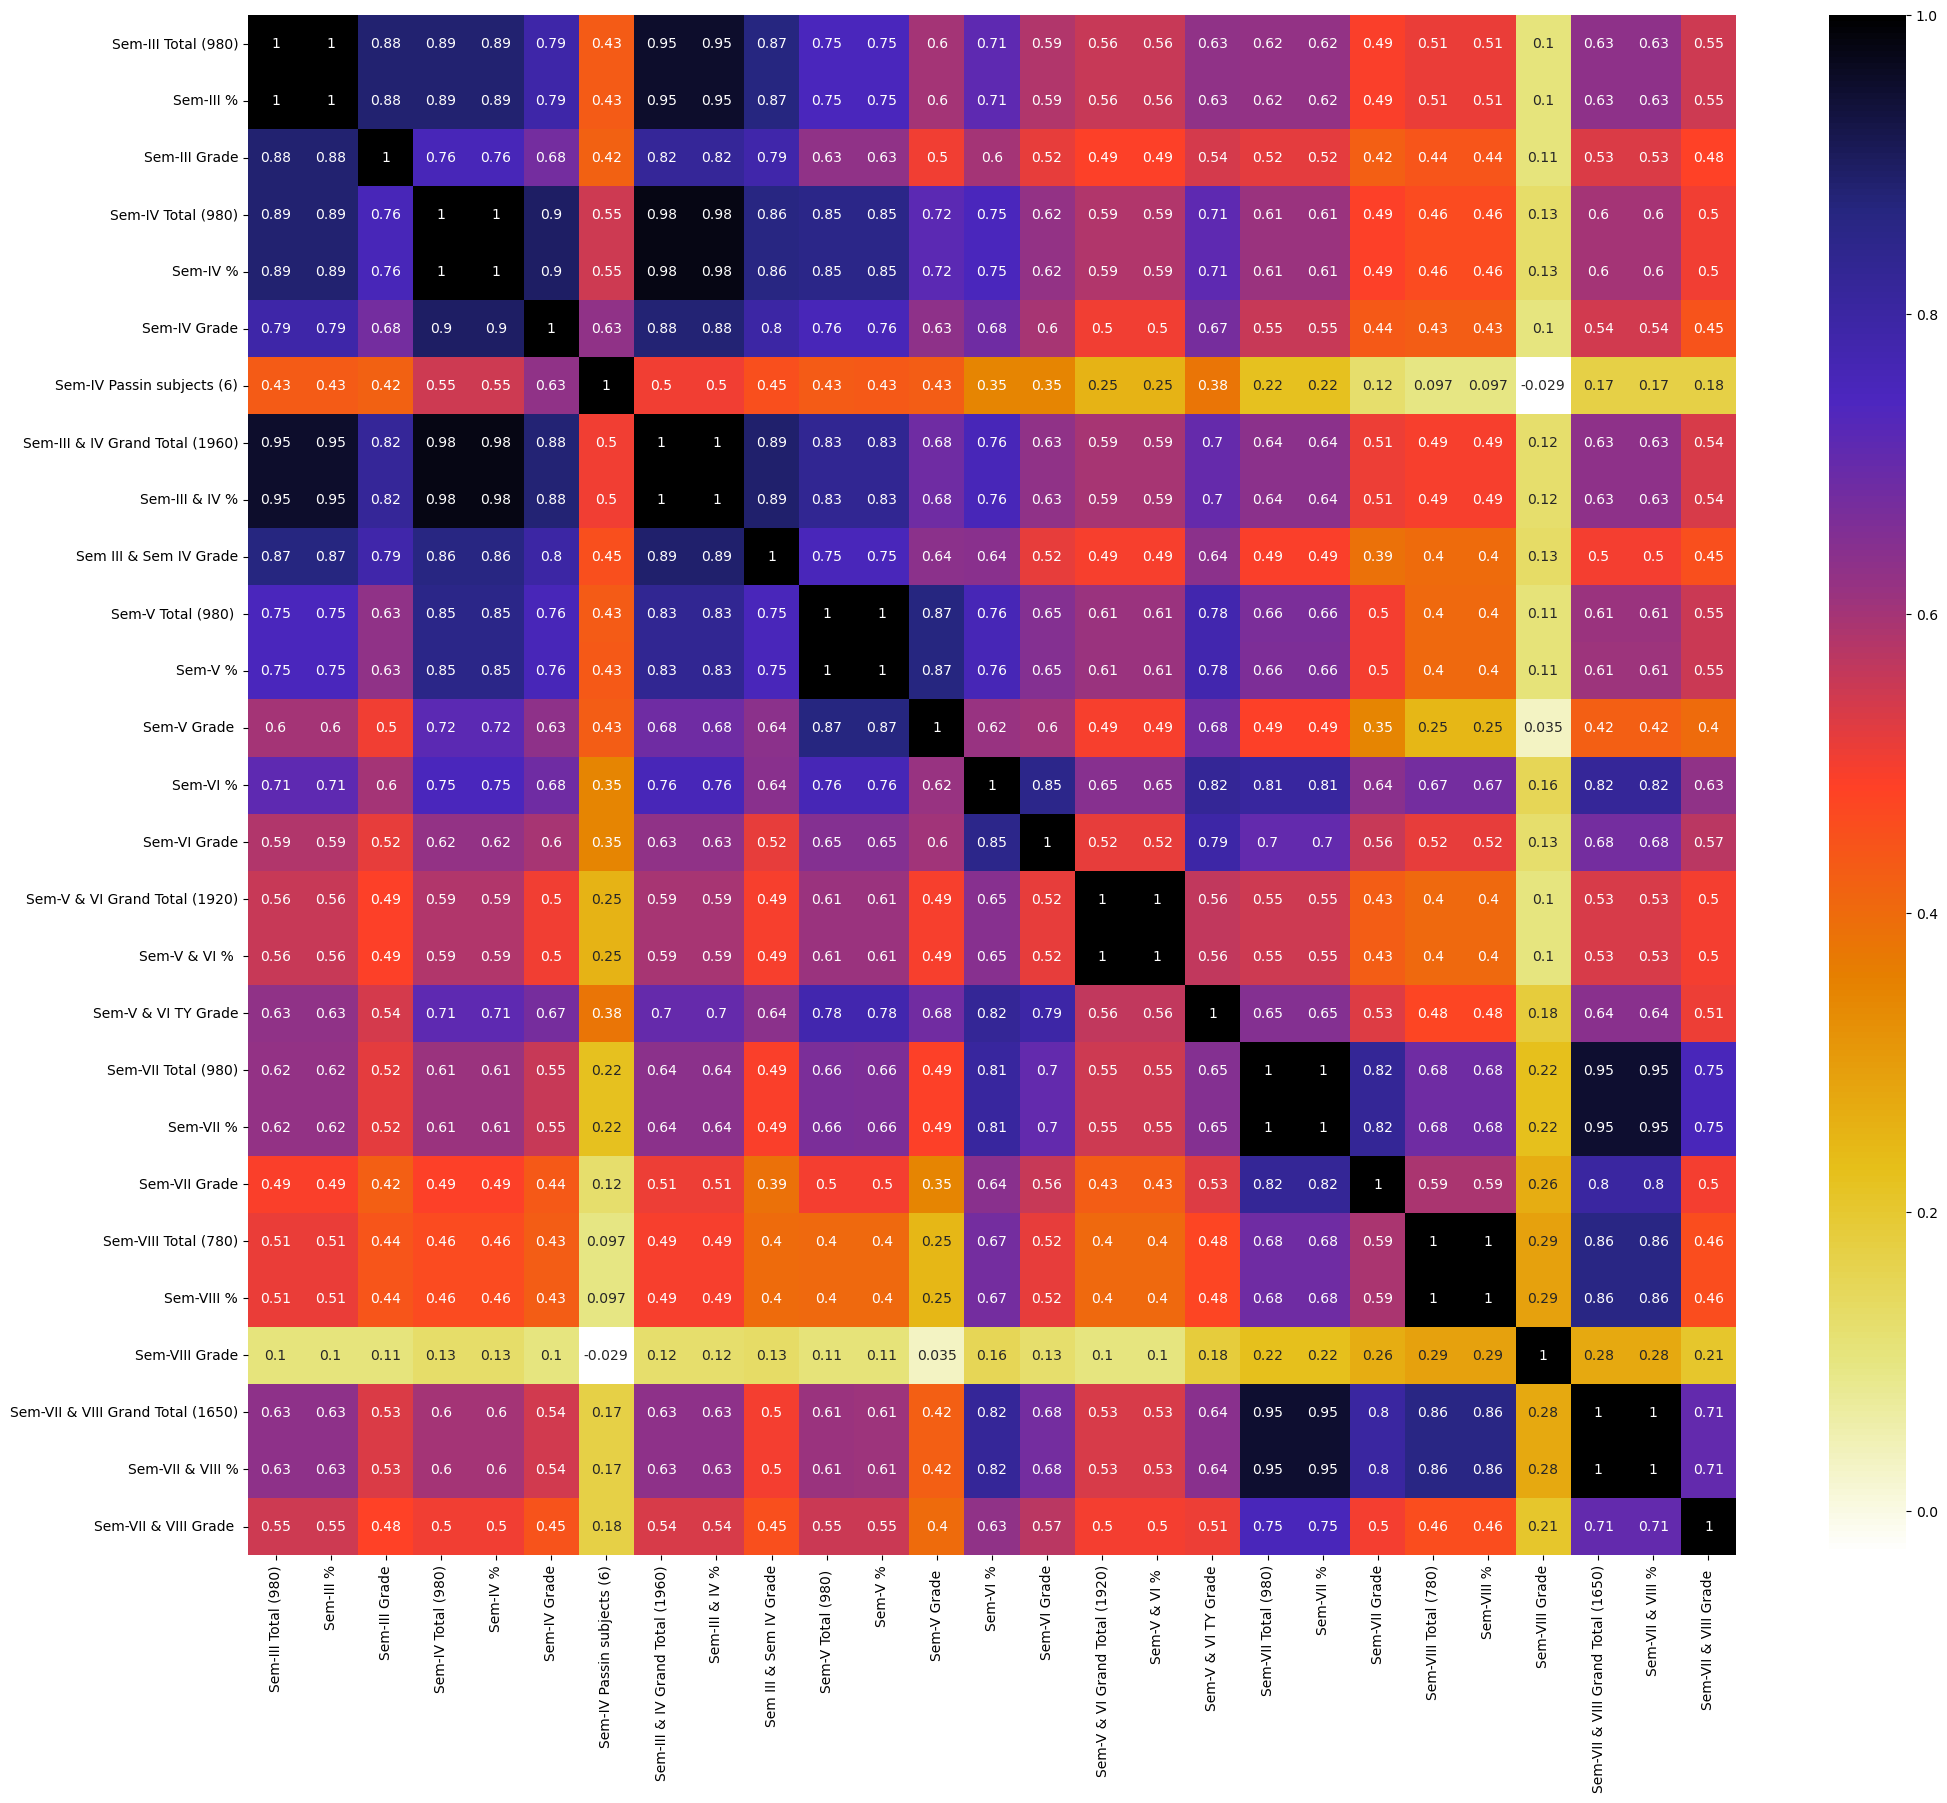

In [40]:
#Pearson Correlation on sem_df

from sklearn.model_selection import train_test_split

X = sem_df #features
y = final_df[' Grade '] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24,20))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [41]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

10

In [42]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)
sem_df = pd.concat([X_train, X_test], ignore_index=True)


In [43]:
sem_df.head()

Sem-III Total (980)  Sem-III Grade  Sem-IV Total (980)  Sem-IV Grade  \
0                  575              5                 579             5   
1                  637              6                 667             6   
2                  608              5                 622             5   
3                  618              5                 626             5   
4                  422              1                 470             3   

   Sem-IV Passin subjects (6)  Sem III & Sem IV Grade  Sem-V Total (980)   \
0                           6                       5                 586   
1                           6                       6                 700   
2                           6                       5                 647   
3                           6                       5                 676   
4                           6                       4                 562   

   Sem-V Grade   Sem-VI %  Sem-VI Grade  Sem-V & VI Grand Total (1920)  \
0             3     61.71             3                         1139.0   
1             5     77.94             5                         1382.0   
2             5     76.00             5                         1312.0   
3             5     75.54             5                         1337.0   
4             4     61.26             3                         1098.0   

   Sem-V & VI TY Grade  Sem-VII Total (980)  Sem-VII Grade  \
0                    4                  532              4   
1                    5                  672              6   
2                    5                  608              5   
3                    5                  631              5   
4                    4                  514              3   

   Sem-VIII Total (780)  Sem-VIII Grade  Sem-VII & VIII Grade   
0                   757               6                      5  
1                   782               6                      6  
2                   781               6                      5  
3                   794               6                      6  
4                   719               6                      5

In [44]:
sem_df.to_csv('sem.csv', index=False)

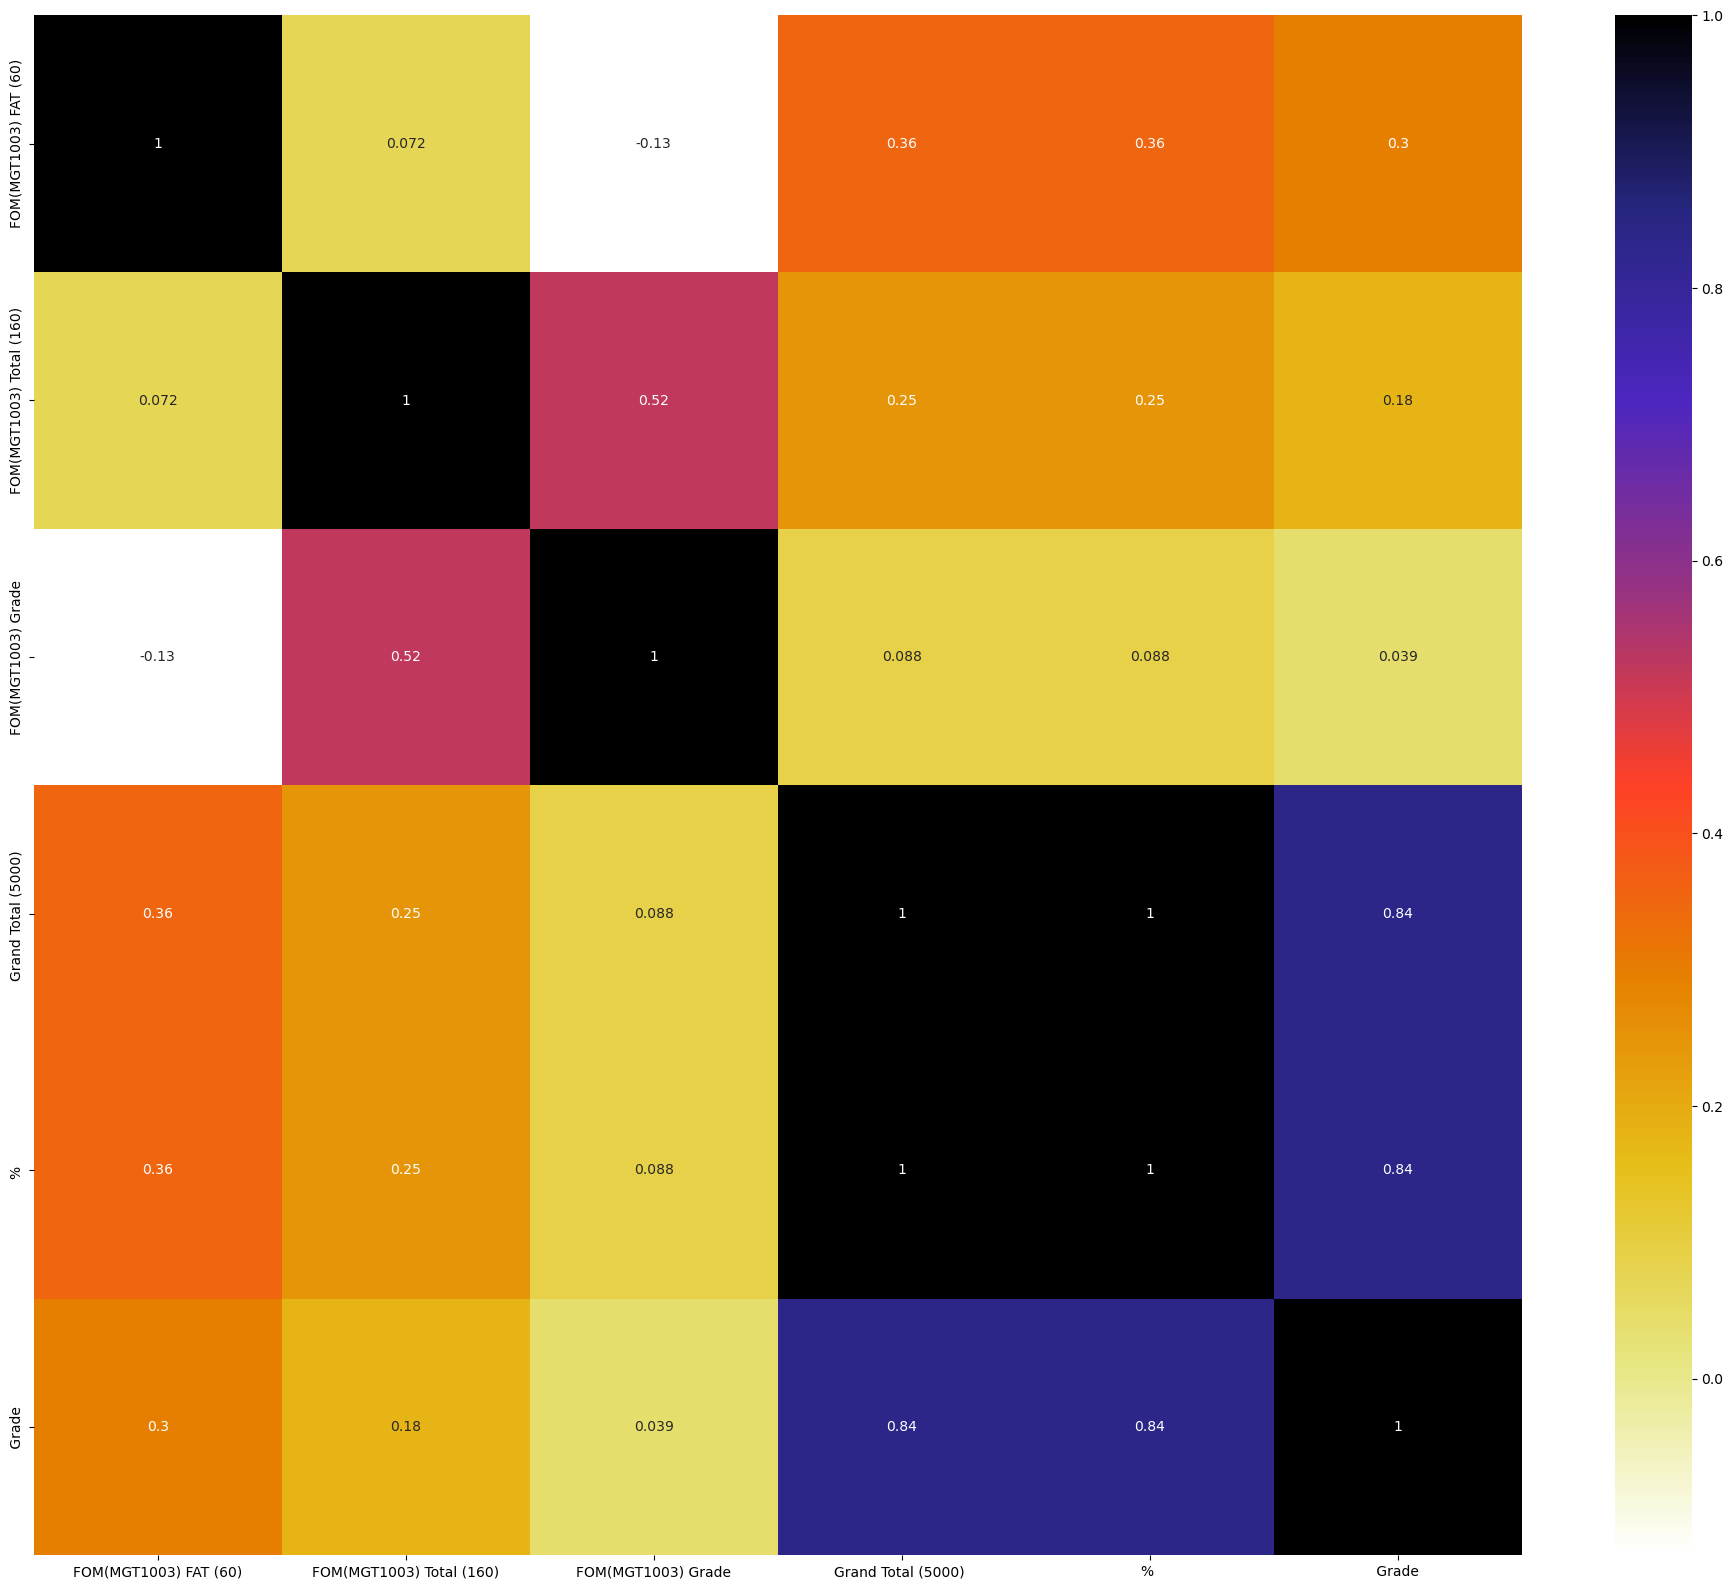

In [45]:
#Pearson Correlation on final_df

from sklearn.model_selection import train_test_split

X = final_df #features
y = final_df[' Grade '] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24,20))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [46]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

1

In [47]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)
final_df = pd.concat([X_train, X_test], ignore_index=True)
final_df.head()

FOM(MGT1003) FAT (60)  FOM(MGT1003) Total (160)  FOM(MGT1003) Grade  \
0                     20                       107                   6   
1                     21                       119                   6   
2                     23                       118                   6   
3                     23                       120                   6   
4                     22                       116                   6   

   Grand Total (5000)    Grade   
0                 3582        4  
1                 4140        6  
2                 3931        5  
3                 4006        5  
4                 3250        4

In [48]:
final_df.to_csv('final.csv', index=False)

## Model Building and Evaluation